In [1]:
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 20
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from datetime import timedelta, datetime
sklearn.model_selection.TimeSeriesSplit

import acquire
import prepare

In [2]:
df = acquire.get_store_item_demand_data()
df = prepare.prep_store_data(df) 

#df = acquire.get_opsd_data()
#df = prepare.prep_opsd_data(df) 

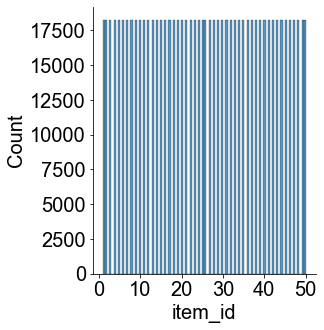

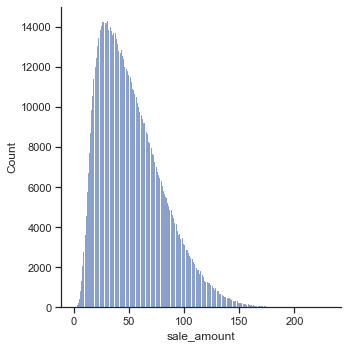

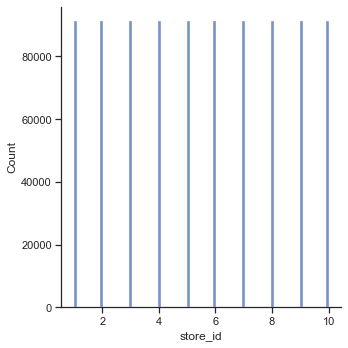

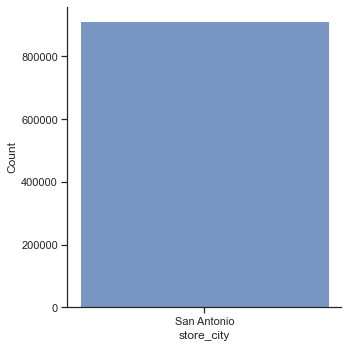

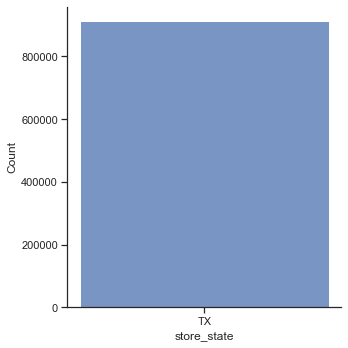

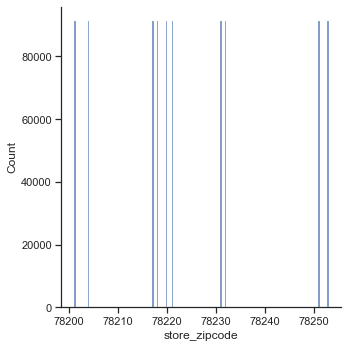

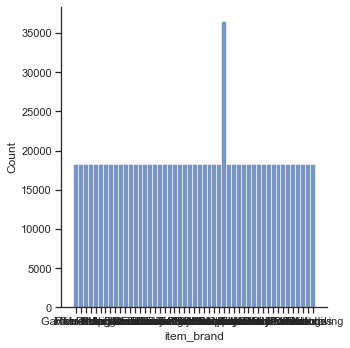

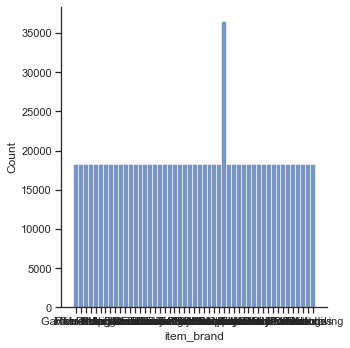

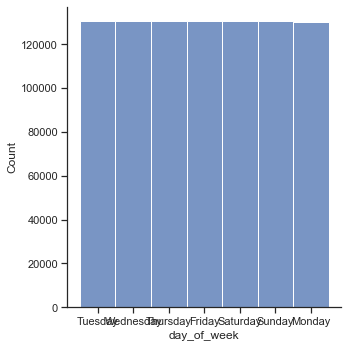

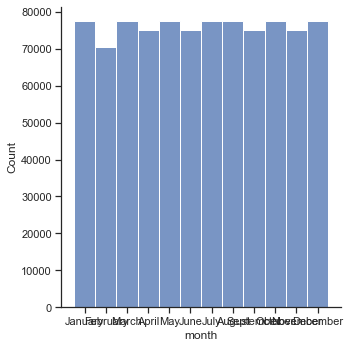

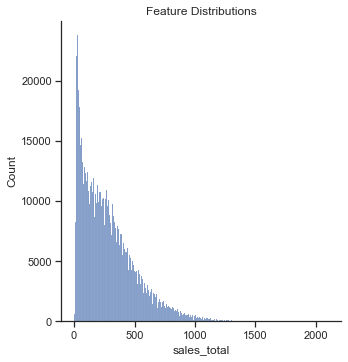

In [3]:
cols = df[['item_id', 'sale_amount', 'store_id', 'store_city', 'store_state', 'store_zipcode', 'item_brand', 'item_brand', 'day_of_week', 'month', 'sales_total' ]]

for column in cols.columns:        
    sns.displot(df[column])
    sns.set(style="ticks")
  # column is chosen here
plt.title('Feature Distributions')
plt.show()

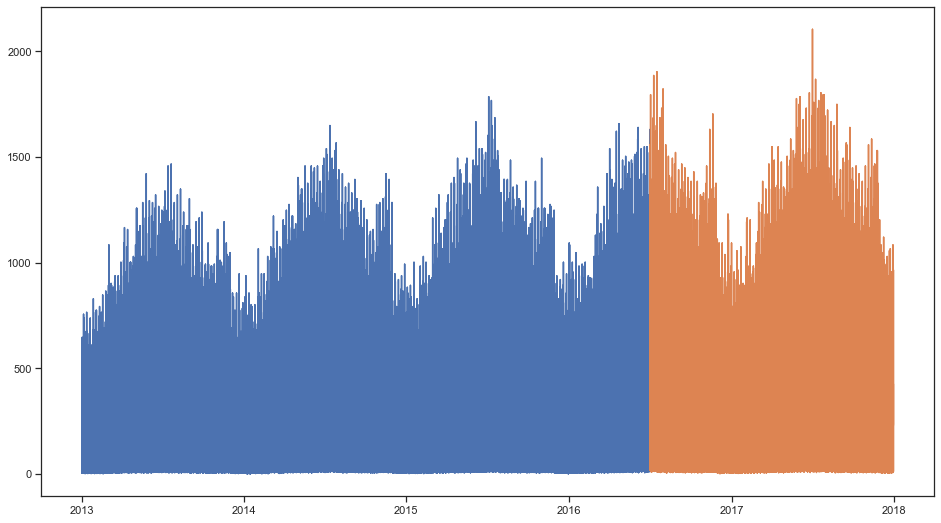

In [4]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] 
test = df[test_start_index:] 

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

In [5]:
y = train.sales_total
y.head()

sale_date
2013-01-01 00:00:00+00:00     10.92
2013-01-01 00:00:00+00:00    218.40
2013-01-01 00:00:00+00:00    125.55
2013-01-01 00:00:00+00:00    453.60
2013-01-01 00:00:00+00:00    294.00
Name: sales_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

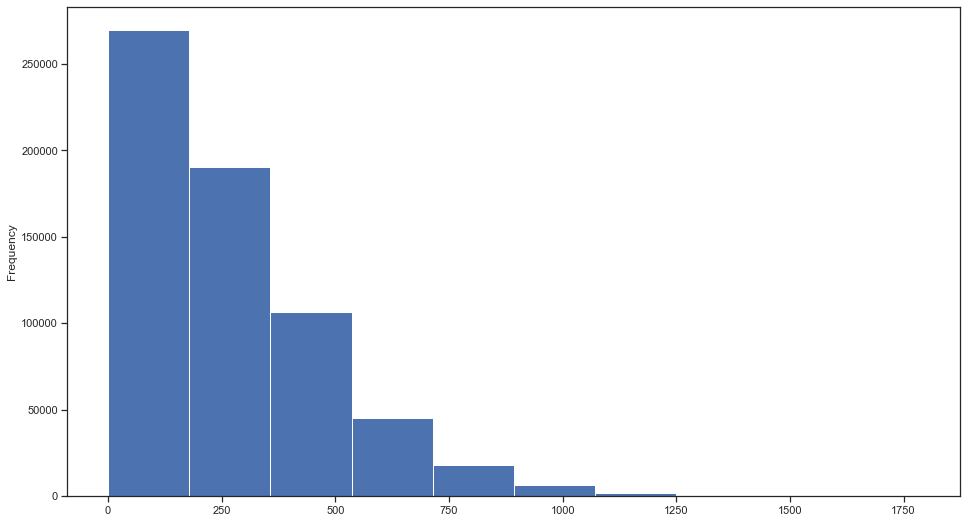

In [6]:
y.plot.hist()

[Text(0.5, 1.0, 'Average Total Sales by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Sales Total')]

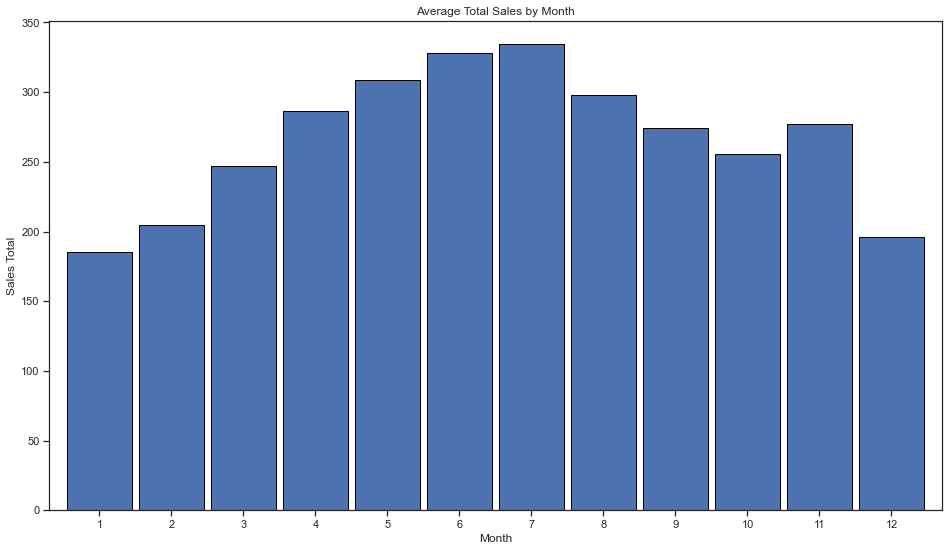

In [7]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Total Sales by Month', xlabel='Month', ylabel='Sales Total')

[Text(0.5, 1.0, 'Average Total Sales by Day'),
 Text(0.5, 0, 'Day'),
 Text(0, 0.5, 'Sales Total')]

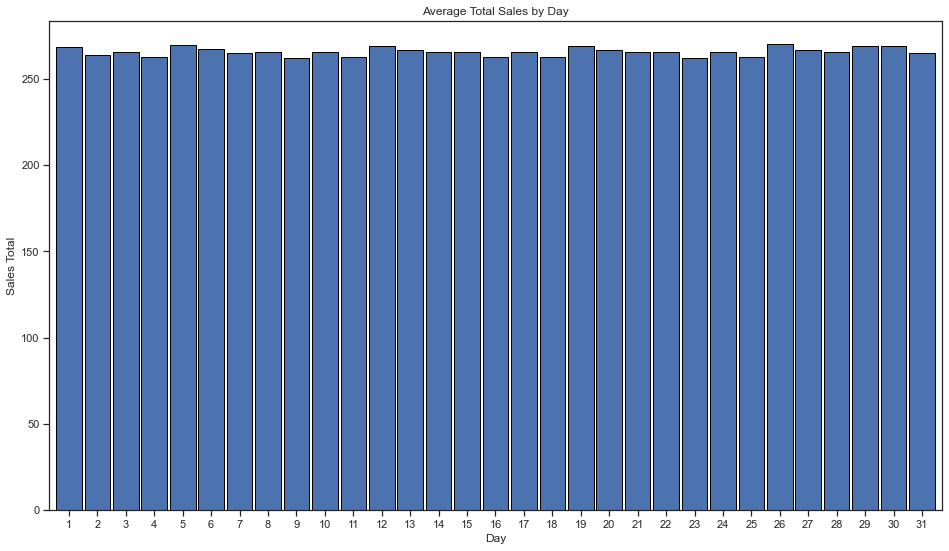

In [22]:
ax = y.groupby(y.index.day).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Total Sales by Day', xlabel='Day', ylabel='Sales Total')

[Text(0.5, 1.0, 'Average Total Sales by Weekday'),
 Text(0.5, 0, 'Weekday'),
 Text(0, 0.5, 'Sales Total')]

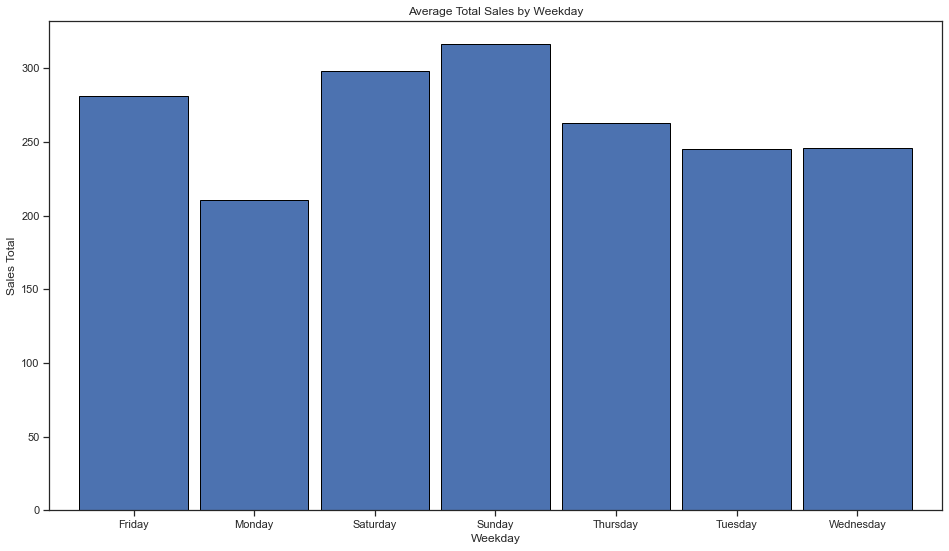

In [12]:
ax = train['sales_total'].groupby(train.day_of_week).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Total Sales by Weekday', xlabel='Weekday', ylabel='Sales Total')

[Text(0.5, 1.0, 'Average Total Sales by Year'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Sales Total')]

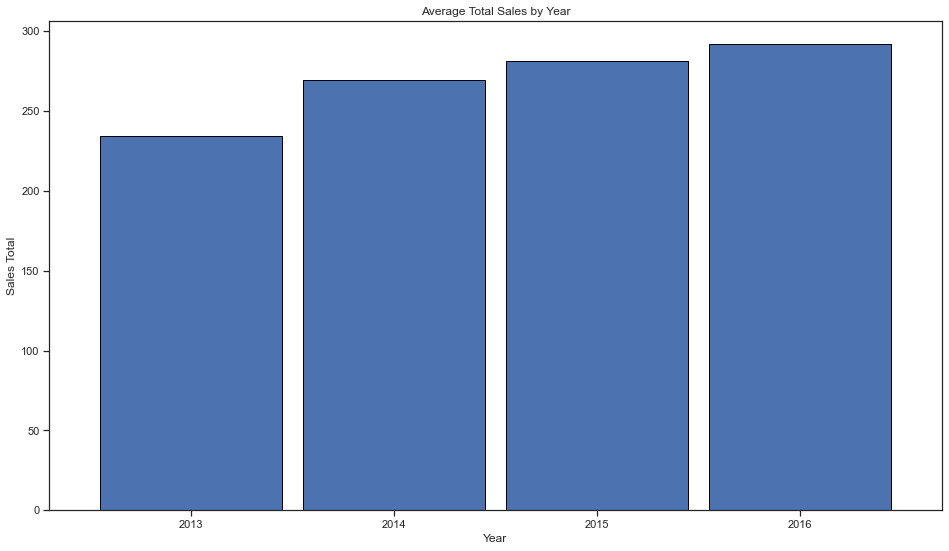

In [14]:
ax = y.groupby(y.index.year).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Total Sales by Year', xlabel='Year', ylabel='Sales Total')

<AxesSubplot:xlabel='sale_date'>

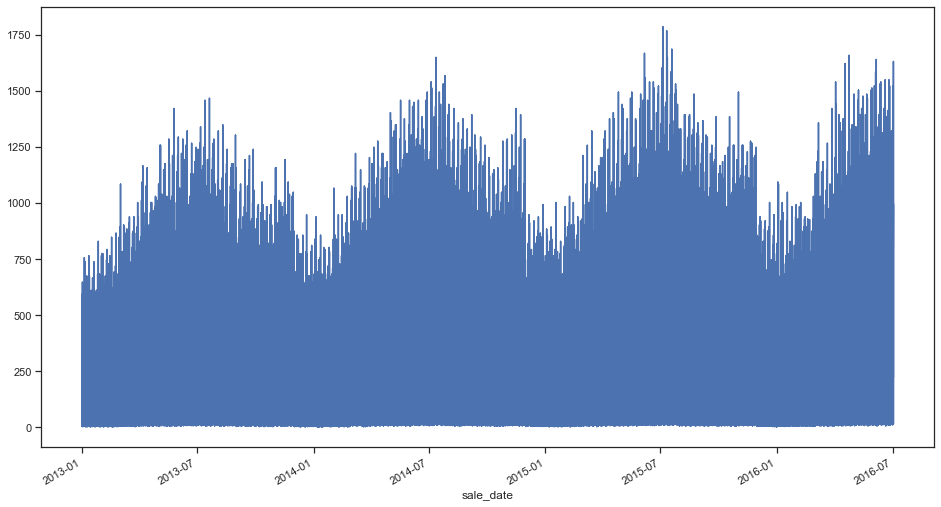

In [15]:
y.plot()

<AxesSubplot:title={'center':'3 day average'}, xlabel='sale_date'>

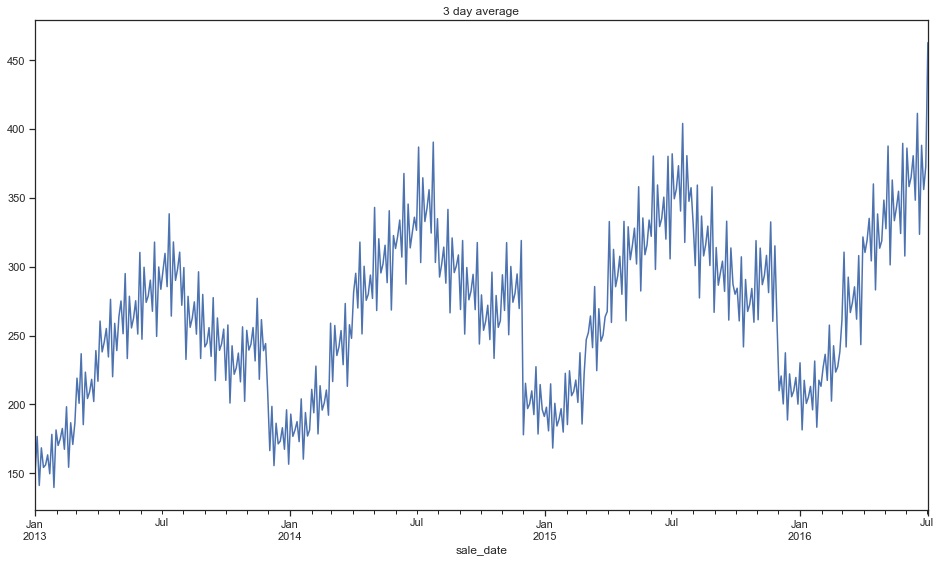

In [18]:
y.resample('3D').mean().plot(title='3 day average')

<AxesSubplot:title={'center':'6 month average'}, xlabel='sale_date'>

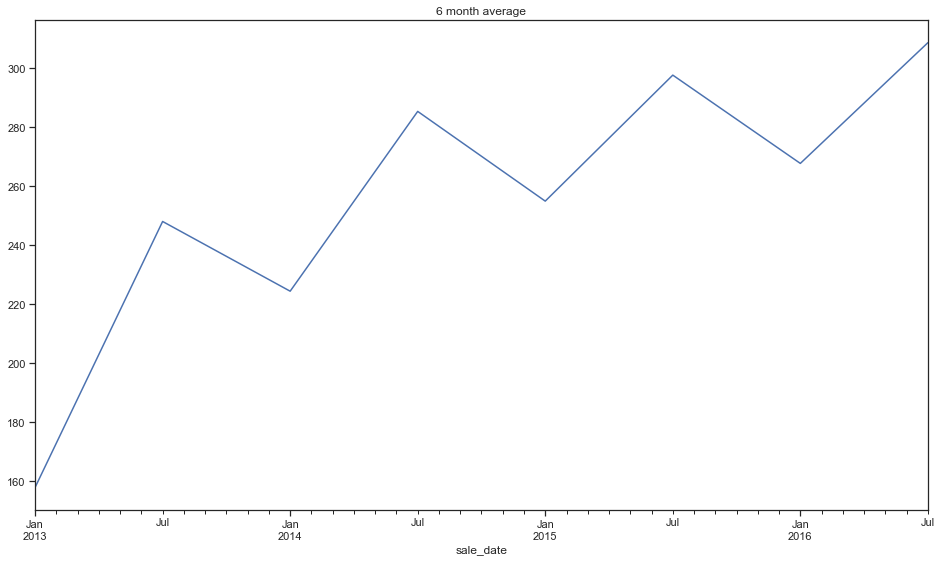

In [19]:
y.resample('6M').mean().plot(title='6 month average')

### Appears to be a definite dip from summer(July) to winter(January)

<AxesSubplot:title={'center':'6 month average'}, xlabel='sale_date'>

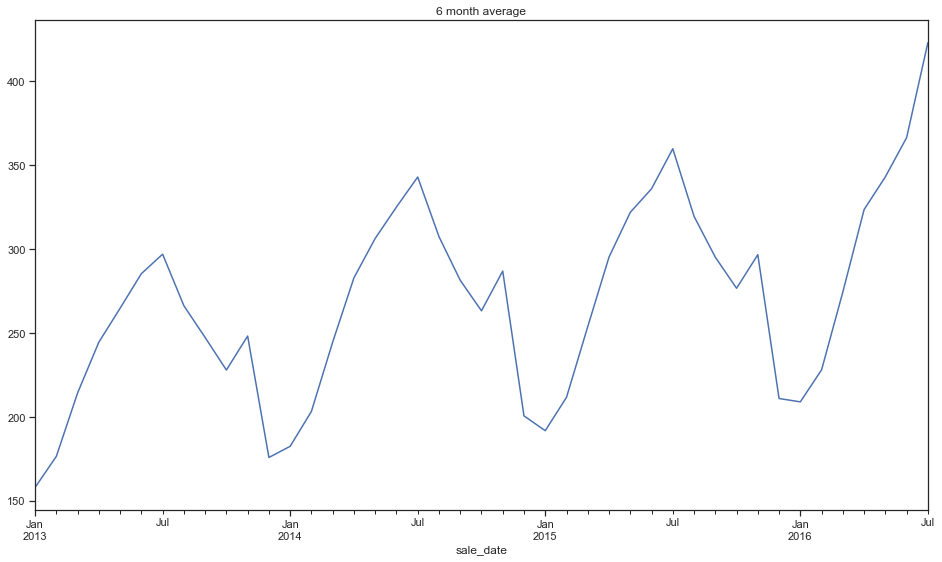

In [21]:
y.resample('1M').mean().plot(title='6 month average')

### Interestingly, there appears to be a seasonality trend that consistent for all months except November. Could this be due to holidays, black friday deals, etc?

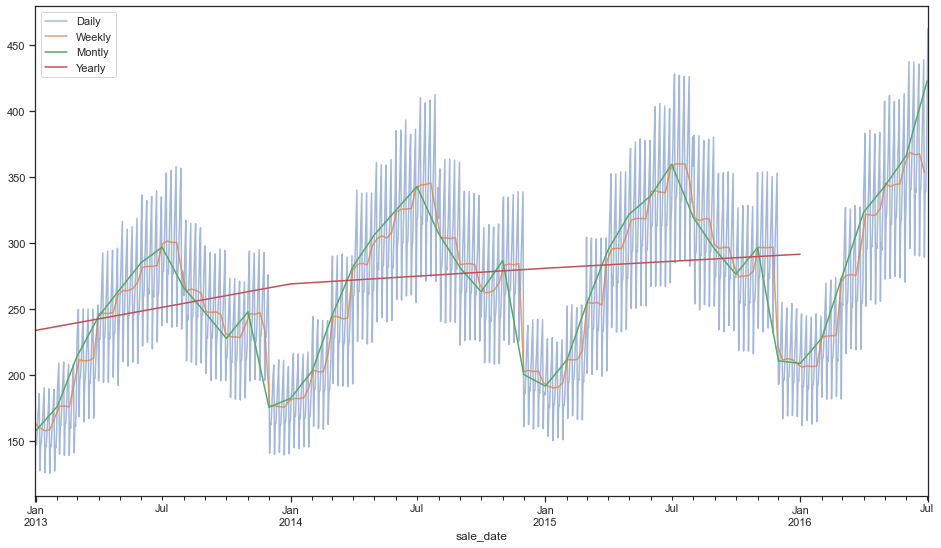

In [24]:
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

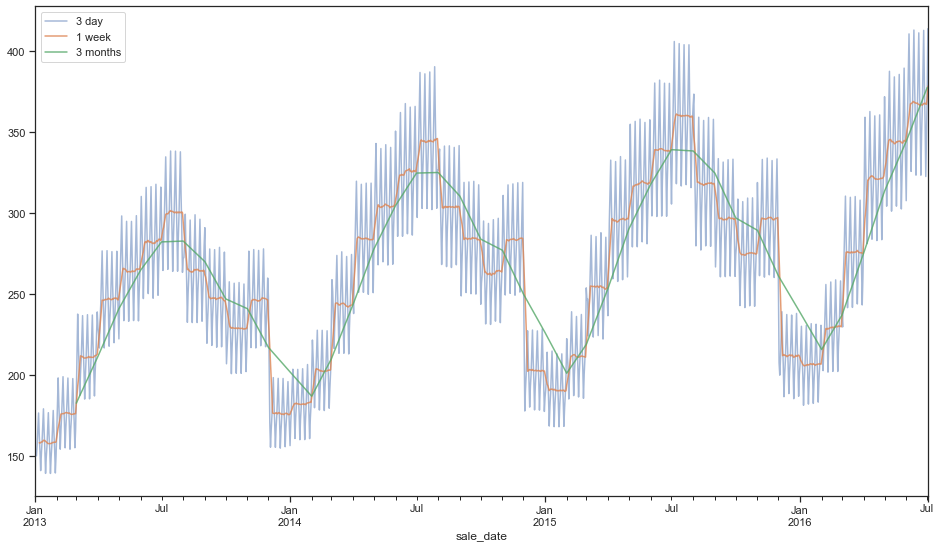

In [26]:
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
y.resample('M').mean().rolling(3).mean().plot(alpha=.8, label='3 months')
plt.legend()

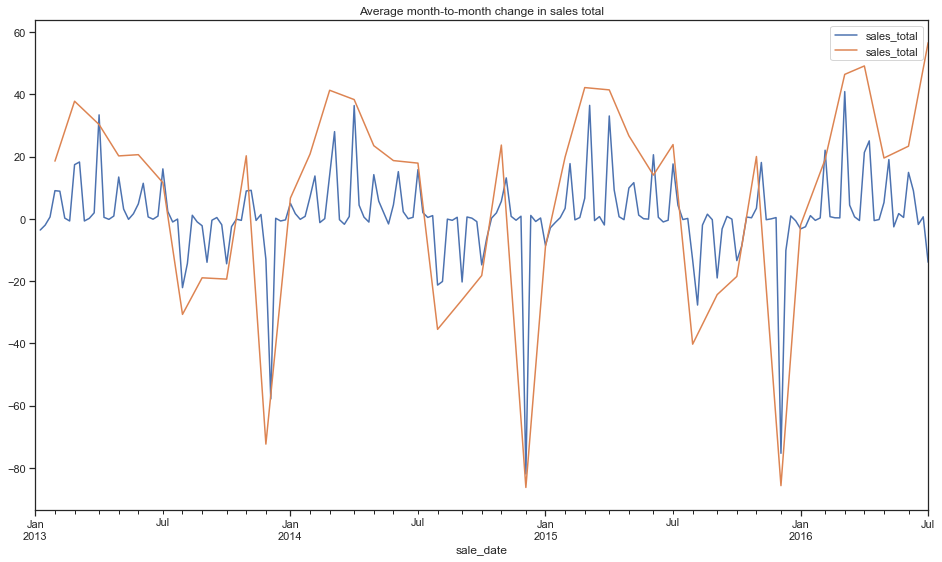

In [28]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in sales total')
y.resample('M').mean().diff().plot(title='Average month-to-month change in sales total')
plt.legend()

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

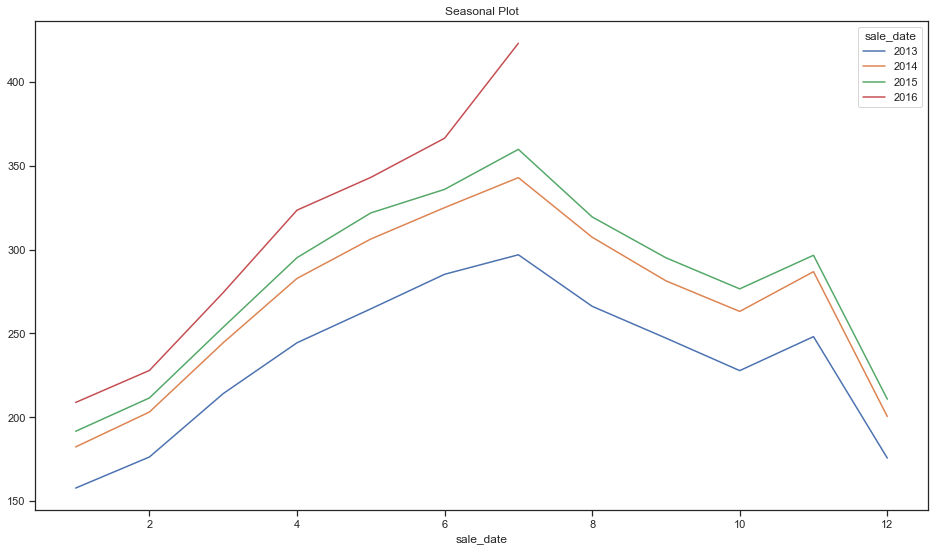

In [29]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

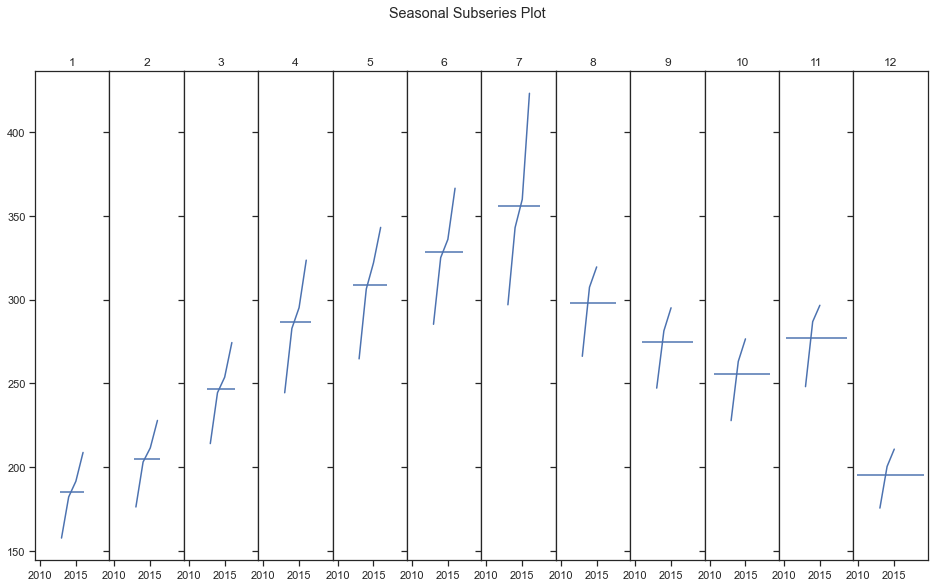

In [30]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


,item_id,sale_amount,sale_id,store_id,store_zipcode,item_price,item_upc12,item_upc14,this_week,the_next_week
sale_date,,,,,,,,,,
2013-01-06 00:00:00+00:00,25.500000,30.355667,455590.50,5.500000,78224.800000,5.160400,2.384688e+11,2.384688e+11,163.589167,159.981203
2013-01-13 00:00:00+00:00,25.500000,29.686286,455597.00,5.500000,78224.800000,5.160400,2.384688e+11,2.384688e+11,159.981203,157.946720
2013-01-20 00:00:00+00:00,25.500000,29.414286,455604.00,5.500000,78224.800000,5.160400,2.384688e+11,2.384688e+11,157.946720,158.545383
2013-01-27 00:00:00+00:00,25.500000,29.513714,455611.00,5.500000,78224.800000,5.160400,2.384688e+11,2.384688e+11,158.545383,167.585014
2013-02-03 00:00:00+00:00,25.500000,31.150571,455618.00,5.500000,78224.800000,5.160400,2.384688e+11,2.384688e+11,167.585014,176.455603
...,...,...,...,...,...,...,...,...,...,...
2016-06-05 00:00:00+00:00,25.500000,67.033714,456836.00,5.500000,78224.800000,5.160400,2.384688e+11,2.384688e+11,359.764591,368.762929
2016-06-12 00:00:00+00:00,25.500000,68.506000,456843.00,5.500000,78224.800000,5.160400,2.384688e+11,2.384688e+11,368.762929,366.946089
2016-06-19 00:00:00+00:00,25.500000,68.261143,456850.00,5.500000,78224.800000,5.160400,2.384688e+11,2.384688e+11,366.946089,367.585309


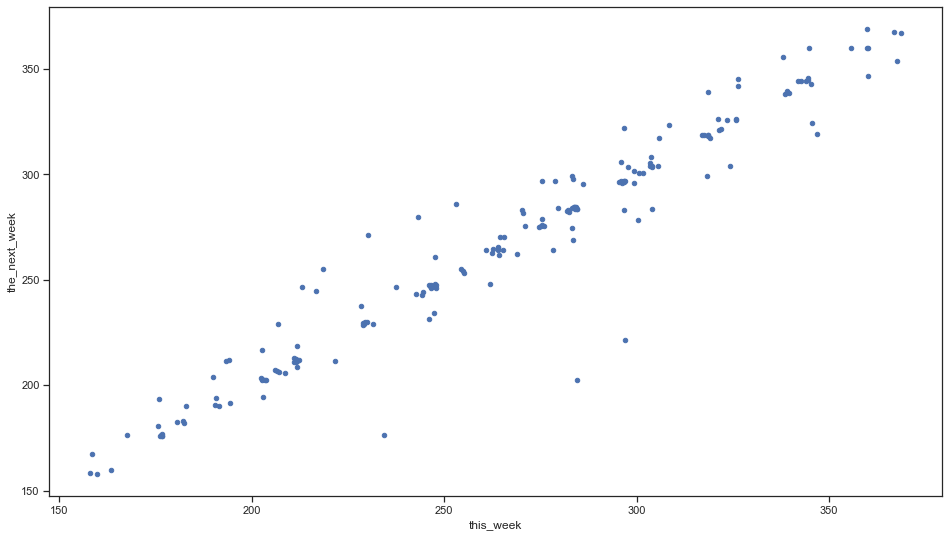

In [34]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

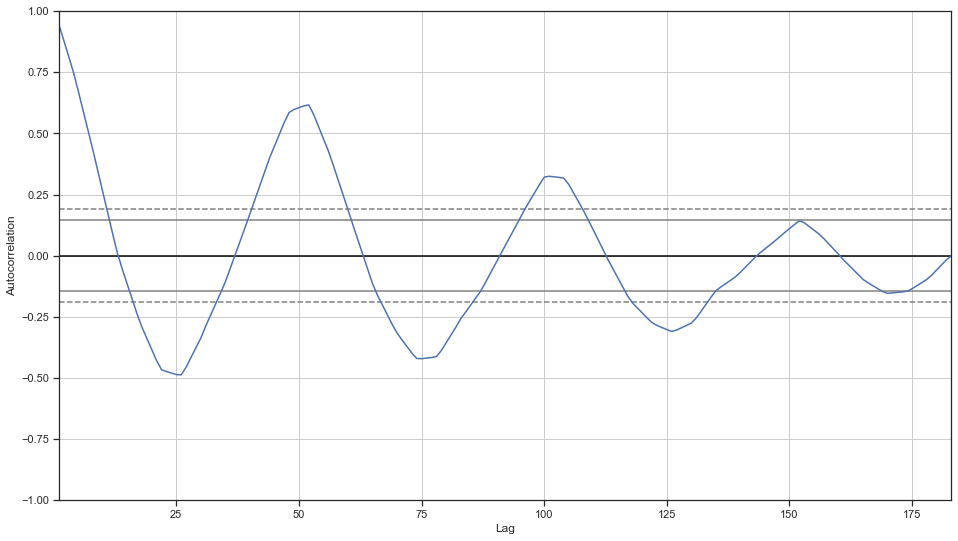

In [35]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

In [36]:
import statsmodels.api as sm

In [37]:
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,163.589167,NaN,-77.817427,NaN
2013-01-13 00:00:00+00:00,159.981203,NaN,-76.420498,NaN
2013-01-20 00:00:00+00:00,157.946720,NaN,-77.661680,NaN
2013-01-27 00:00:00+00:00,158.545383,NaN,-77.653889,NaN
2013-02-03 00:00:00+00:00,167.585014,NaN,-73.077372,NaN


<AxesSubplot:xlabel='sale_date'>

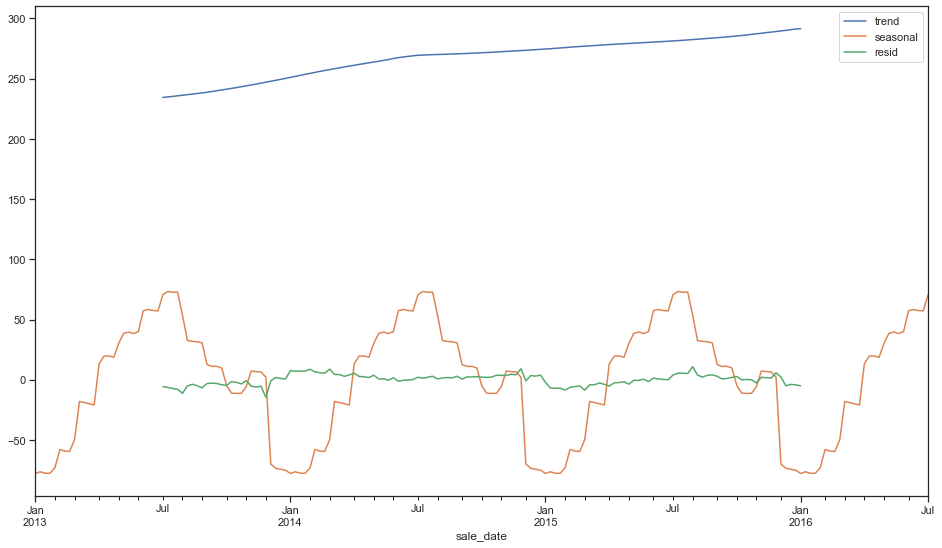

In [38]:
decomposition.iloc[:, 1:].plot()

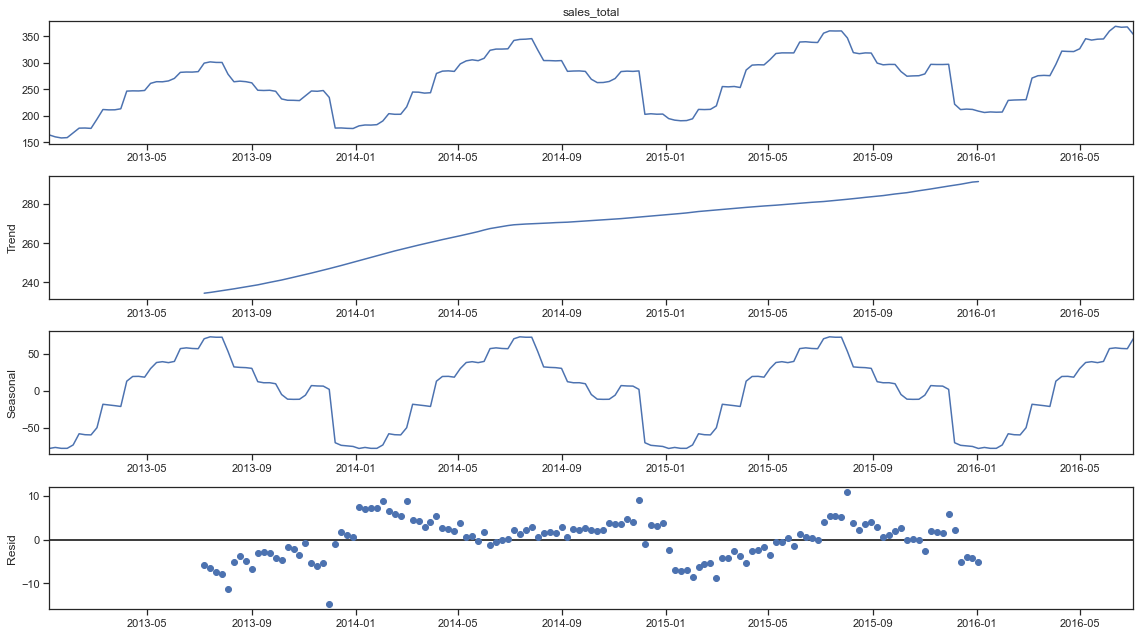

In [39]:
result.plot()
None